## Example on using the functionality on `desc.twinkles.OpSimOrdering`

This notebook demonstrates some of the different properties ofthe `OpSimOrdering` class that are used for the creating the intended sequence of visits in `bin/get_visits_Twinkles` in Twinkles 1 Run 3. This is arranged to get a useful sample quickly, and also on the basis of predictedPhoSim Times.

The basic requirements are :
    - setup Twinkles

## What this shows 
1. Twinkles Run 3.1 : visits from different bands and nights across 10 years. WFD visit if such a viist is available. All visits must take less than 100 hours
2. Twinkles Run 3.1b : Remaining WFD visits that do not take 100 hours
3. Twinkels Run 3.2 : All DDF visits from DR4
4. Twinkles 3p3: Remaining Twinkles visits that are not predicted to take 100 hours
5. How does the ordering Twinkles Run 3 produce more interesting objects at intermediate times than a chronological run

In [1]:
import os
import numpy as np

In [2]:
from sqlalchemy import create_engine

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
from desc.twinkles import OpSimOrdering

In [6]:
from lsst.utils import getPackageDir
twinklesDir = getPackageDir('Twinkles')

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

/usr/local/miniconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [8]:
opSimDBPath = os.path.join('/Users/rbiswas/data/LSST/OpSimData/minion_1016_sqlite.db')

## The code to split Twinkles Observations

In [9]:
ops = OpSimOrdering(opSimDBPath, timeMax=100.)

In [10]:
#Twinkeles Run 3.1
first = ops.Twinkles_3p1

In [11]:
first[['obsHistID', 'expMJD', 'night', 'filter', 'predictedPhoSimTimes']].head()

,obsHistID,expMJD,night,filter,predictedPhoSimTimes
0,230,59580.139555,0,r,15.125699
1,250,59580.149254,0,g,11.765881
2,260,59580.154787,0,i,14.933507
3,280,59580.164486,0,z,17.603149
4,306,59580.176685,0,y,23.431979


In [12]:
# Twinkles Run 3.1b
obs_3p1b = ops.Twinkles_3p1b[['obsHistID', 'night', 'propID', 'predictedPhoSimTimes']]
obs_3p1b.head()

,obsHistID,night,propID,predictedPhoSimTimes
1,183811,243,54,11.869360
4,185736,245,54,12.568578
5,185785,245,54,11.018340
7,187525,247,54,36.685327
8,187546,247,54,37.839777


In [13]:
# Twinkles 3.2
ops.Twinkles_3p2.head()

,obsHistID,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,...,rawSeeing,wind,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec,year,predictedPhoSimTimes
10110,994171,1016,56,1427,0.925184,-0.4789,z,126497354,61044.089753,1464,...,0.817253,0.0,0.0,0.0,2.0,22.448782,0.899373,-0.465674,4,58.937639
10111,994172,1016,56,1427,0.925184,-0.4789,z,126497390,61044.090170,1464,...,0.817253,0.0,0.0,0.0,2.0,22.447518,0.899373,-0.465674,4,58.937639
10112,994173,1016,56,1427,0.925184,-0.4789,z,126497426,61044.090587,1464,...,0.817253,0.0,0.0,0.0,2.0,22.446253,0.899373,-0.465674,4,59.582655
10113,994174,1016,56,1427,0.925184,-0.4789,z,126497462,61044.091003,1464,...,0.817253,0.0,0.0,0.0,2.0,22.444987,0.899373,-0.465674,4,59.582655
10114,994175,1016,56,1427,0.925184,-0.4789,z,126497498,61044.091420,1464,...,0.817253,0.0,0.0,0.0,2.0,22.443719,0.899373,-0.465674,4,59.582655


In [14]:
ops.Twinkles_3p3.head()

,obsHistID,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,...,rawSeeing,wind,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec,year,predictedPhoSimTimes
920,231,1016,56,1427,0.925184,-0.4789,r,12093,59580.139972,0,...,0.791241,0.0,0.0,0.0,2.0,24.143180,0.907976,-0.505351,0,15.125699
921,232,1016,56,1427,0.925184,-0.4789,r,12129,59580.140389,0,...,0.791241,0.0,0.0,0.0,2.0,24.141983,0.907976,-0.505351,0,15.125699
922,233,1016,56,1427,0.925184,-0.4789,r,12165,59580.140805,0,...,0.859965,0.0,0.0,0.0,2.0,24.068792,0.907976,-0.505351,0,15.149455
923,234,1016,56,1427,0.925184,-0.4789,r,12201,59580.141222,0,...,0.859965,0.0,0.0,0.0,2.0,24.067582,0.907976,-0.505351,0,15.149455
924,235,1016,56,1427,0.925184,-0.4789,r,12237,59580.141639,0,...,0.859965,0.0,0.0,0.0,2.0,24.066363,0.907976,-0.505351,0,15.149455


In [16]:
#obsHistIDs that have visits with extremely long phosim prediction times
ops.obsHistIDsPredictedToTakeTooLong['filter'].unique()

array([u'i', u'r', u'g'], dtype=object)

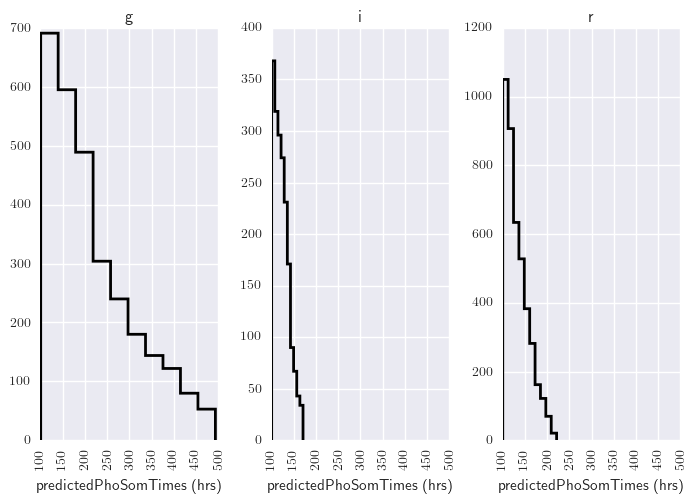

In [17]:
fig, ax = plt.subplots(1, 3, sharex=True)
ops.obsHistIDsPredictedToTakeTooLong\
    .sort_values(by='predictedPhoSimTimes')\
    .hist(column='predictedPhoSimTimes', histtype='step', lw=2, alpha=1, color='k',
          by='filter', ax=ax, cumulative=-1)
for axx in ax:
    axx.set_xlabel('predictedPhoSomTimes (hrs)')

In [18]:
len(ops.obsHistIDsPredictedToTakeTooLong)

2109

### To Write this to a single csv file:

In [ ]:
df = pd.concat([ops.Twinkles_3p1, ops.Twinkles_3p2, ops.Twinkles_3p3])
TwinklesObsHistIDFileNames = os.path.join(twinklesDir, 'data', 'TwinklesObsHistIDs.csv')
df.obsHistID.to_csv(TwinklesObsHistIDFileNames, index=False, )

# Effects of the design: What can we expect for Twinkles 3?

The suggested value for timeMax is 100.0 hours, while the max on the nfs farm is 120 hours. First let us look at the distribution of predicted phosim run times in the entire set (once the duplicates have been dropped)

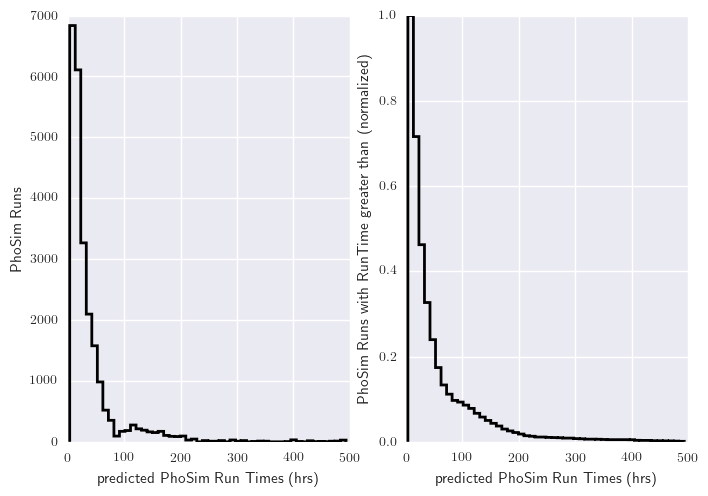

In [19]:
fig, ax = plt.subplots(1, 2)
sns.distplot(ops.uniqueOpSimRecords.predictedPhoSimTimes, hist=True, rug=False,
             hist_kws=dict(histtype='step', lw=2, color='k', alpha=1), kde=False, ax=ax[0])
sns.distplot(ops.uniqueOpSimRecords.predictedPhoSimTimes, hist=True, rug=False,
             hist_kws=dict(histtype='step', lw=2, color='k', alpha=1, 
                           cumulative=-1, normed=1), kde=False, ax=ax[1])
ax[0].set_ylabel('PhoSim Runs')
ax[1].set_ylabel('PhoSim Runs with RunTime greater than (normalized)')
ax[0].set_xlabel('predicted PhoSim Run Times (hrs)')
ax[1].set_xlabel('predicted PhoSim Run Times (hrs)')

In [20]:
_s = 'The number of visits that are too long is {0}, while the total number of unique runs is {1}. If we had selected timeMax=120.0 instead of the suggested 100. we might expect to get 1625 visits, getting us an additional gain of {2} visits'\
.format(len(ops.obsHistIDsPredictedToTakeTooLong), 
len(ops.uniqueOpSimRecords), len(ops.obsHistIDsPredictedToTakeTooLong) - 1625)
print(_s)

The number of visits that are too long is 2109, while the total number of unique runs is 24079. If we had selected timeMax=120.0 instead of the suggested 100. we might expect to get 1625 visits, getting us an additional gain of 484 visits


## What will we get in Twinkles 3.1 ?

In [21]:
_s = 'Twinkles 3.1 will have {0} visits of which {1} are WFD visits'.format(len(ops.Twinkles_3p1),
                                                        len(ops.Twinkles_3p1.query('propID==54')))
print(_s)

Twinkles 3.1 will have 1508 visits of which 546 are WFD visits


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e791990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f15e4d0>]], dtype=object)

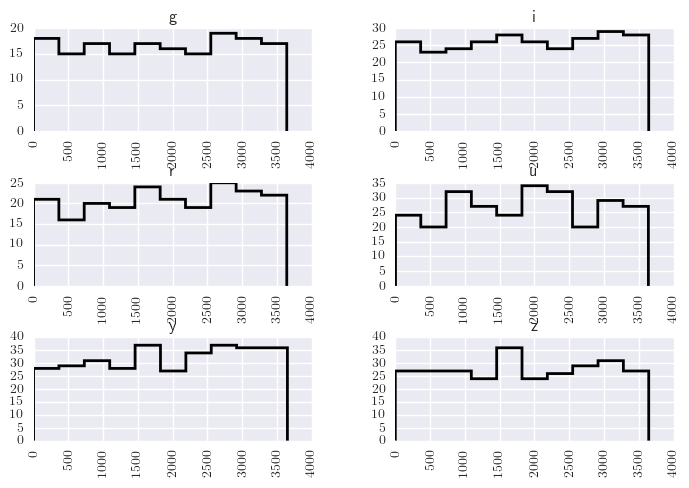

In [22]:
ops.Twinkles_3p1.hist(column='night', by='filter', histtype='step', lw=2, color='k',
                      alpha=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11f8e5e10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11fa43f90>], dtype=object)

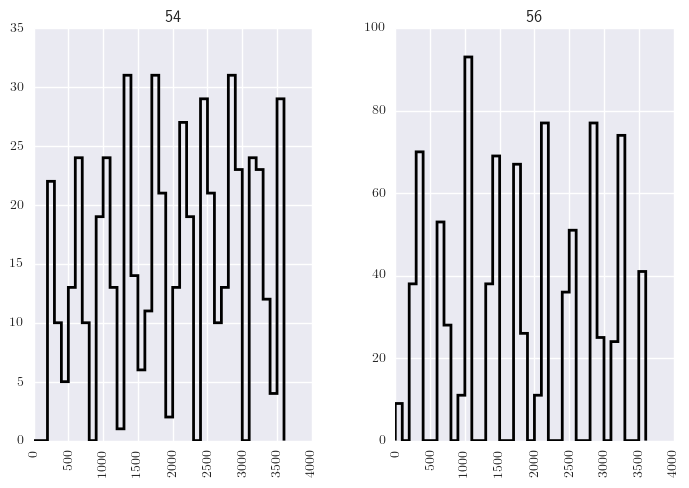

In [23]:
ops.Twinkles_3p1.hist(column='night', by='propID', histtype='step', lw=2, color='k',
                      alpha=1, bins=np.arange(0., 3650., 100.))

### Coverage : How does the Twinkles Run 3 design provide more objects during intermediate times compared to a simple chronological run

In [24]:
chronological = ops.filteredOpSim.copy().sort_values(by='expMJD')
chronological['cpuHoursUsed'] = chronological.predictedPhoSimTimes.cumsum()

In [25]:
def chronologicalReturns(chronologicaldf, timeUsed):
    """
    return the number of visits, unique combinations, and range in nights done in a certain amount of time 
    if the visits were chronological
    
    Parameters
    ----------
    chronological : `pd.DataFrame`
        which must be ordered chronologically by `expMJD` and have the columns `night`, `filter`
        and `cpuHoursUsed`
    timeUsed : float
        CPU Hours 
    """
    done = chronologicaldf.query('cpuHoursUsed < @timeUsed')
    return [len(done), len(done.groupby(['night', 'filter']).groups.keys()),
                done.night.max() - done.night.min()]

In [26]:
s_ = 'The Twinkles 3.1 design is meant to provide good coverage over unique combinations of'
s_ += 'nights and filters. This is useful, because it provides us with good time sampling of'
s_ += 'all astrophysical light curves, even though the effective signal to noise ratio on the'
s_ += 'light curve is mlower than in a DDF field roughly by a factor ~5. Further, it allows coaddition of sky near bright transients'
s_ += '(based on current OpSim). The total number of CPU hours used in Twinkles_3p1 is {0}'
s_ += 'to produce {1} visits, each of which are unique combinations of `night` and `filter`. In the same time (assumed to be used serially), a chronological '
s_ += 'ordering of visits would produce {2} visits but only {3} unique combinations.'
s_ += 'Unlike Twinkles 3.1 which spans all 10 years, this time would be used in getting visits'
s_ += 'spread over the first {4} nights'

In [27]:
cr = chronologicalReturns(chronological, ops.Twinkles_3p1.predictedPhoSimTimes.sum())
print(s_.format(ops.Twinkles_3p1.predictedPhoSimTimes.sum(),
                len(ops.Twinkles_3p1),
                cr[0],
                cr[1], 
                cr[2]))

The Twinkles 3.1 design is meant to provide good coverage over unique combinations ofnights and filters. This is useful, because it provides us with good time sampling ofall astrophysical light curves, even though the effective signal to noise ratio on thelight curve is mlower than in a DDF field roughly by a factor ~5. Further, it allows coaddition of sky near bright transients(based on current OpSim). The total number of CPU hours used in Twinkles_3p1 is 39970.7541743to produce 1508 visits, each of which are unique combinations of `night` and `filter`. In the same time (assumed to be used serially), a chronological ordering of visits would produce 1802 visits but only 109 unique combinations.Unlike Twinkles 3.1 which spans all 10 years, this time would be used in getting visitsspread over the first 336 nights


In [28]:
timeSamples = np.linspace(0., ops.Twinkles_3p1.predictedPhoSimTimes.sum(), 100)

In [29]:
f = lambda x: [x] + chronologicalReturns(chronological, x)
chronologicaltimes = np.array(map(f, timeSamples))

In [30]:
first = ops.Twinkles_3p1.copy()

In [31]:
first['cpuHoursUsed'] = first.predictedPhoSimTimes.cumsum()

In [32]:
g = lambda x: [x] + chronologicalReturns(first, x)
Twinkles3p1times = np.array(map(g, timeSamples))

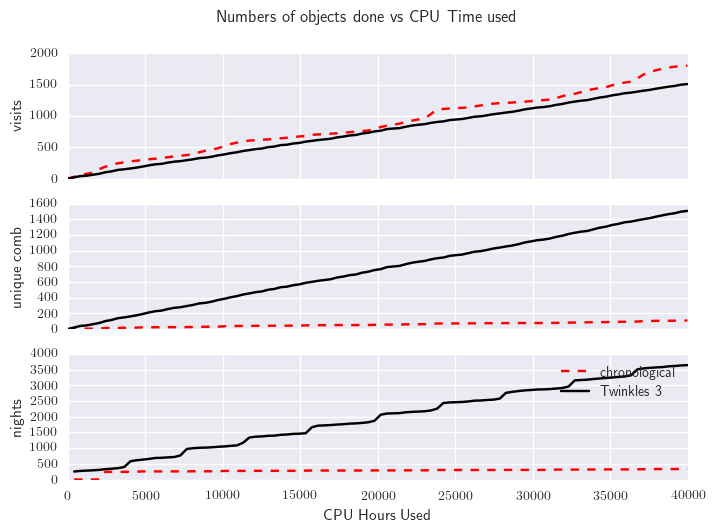

In [36]:
fig, ax = plt.subplots(3, 1, sharex=True)
for ii in range(3):
    ax[ii].plot(timeSamples, chronologicaltimes[:, ii+1], 'r--', label='chronological')
    ax[ii].plot(timeSamples, Twinkles3p1times[:, ii+1], 'k-', label='Twinkles 3')
ax[0].set_ylabel('visits')
ax[1].set_ylabel('unique comb')
ax[2].set_ylabel('nights')
ax[2].set_xlabel('CPU Hours Used')
plt.legend()
fig.suptitle('Numbers of objects done vs CPU Time used')

In [37]:
fig.savefig('TwinklesPredictedTimes.png')

Plot describing the differences between Twinkles 3.1 and a chronological ordering of visits

In [23]:
#grouped = ops.Twinkles_3p1.groupby('filter')
#sns.jointplot(x='moonAlt', y='predictedPhoSimTimes', data=grouped.get_group('u'))
#sns.jointlot(x='moonAlt', y='predictedPhoSimTimes', data=grouped.get_group('g'))
#sns.jointplot(x='moonAlt', y='predictedPhoSimTimes', data=grouped.get_group('r'))
#sns.jointplot(x='moonAlt', y='predictedPhoSimTimes', data=grouped.get_group('i'))
#sns.jointplot(x='moonAlt', y='predictedPhoSimTimes', data=grouped.get_group('z'))
#sns.jointplot(x='moonAlt', y='predictedPhoSimTimes', data=grouped.get_group('y'))

## Scratch: Tests and Details about the code

In [25]:
pts = ops.fullOpSimDF(opSimDBPath)

In [26]:
## Everything in the OpSim query
len(pts) == len(ops._opsimDF)

True

In [27]:
## After dropping duplicates, this is the same as ops.uniqueOpSimRecords
pts.drop_duplicates(subset='obsHistID', inplace=True)
len(pts)== ops.uniqueOpSimRecords.obsHistID.size

True

In [28]:
## In general ops.filteredOpSim has less or equal records compared to ops.uniqueOpSimRecords
ops.uniqueOpSimRecords.obsHistID.size >= ops.filteredOpSim.obsHistID.size

True

In [29]:
n1 = ops.Twinkles_3p1.obsHistID.size

In [30]:
n2 = ops.Twinkles_3p2.obsHistID.size

In [31]:
n3 = ops.Twinkles_3p3.obsHistID.size

In [32]:
n1 + n2 + n3  == len(ops.filteredOpSim)

True

In [33]:
v1 = ops.Twinkles_3p1.obsHistID.values.tolist()
v2 = ops.Twinkles_3p2.obsHistID.values.tolist()
v3 = ops.Twinkles_3p3.obsHistID.values.tolist()

In [34]:
`ops.filteredOpSim.set_index('obsHistID').ix[v1].groupby(['night', 'filter']).groups.keys()

SyntaxError: invalid syntax (<ipython-input-34-8b2e39063258>, line 1)

In [ ]:
ops.filteredOpSim.set_index('obsHistID').ix[v1].groupby(['night', 'filter']).expMJD.count().unique().tolist() == [1]

In [ ]:
np.unique(np.array(v1 + v2 + v3)).size == len(ops.filteredOpSim)

In [ ]:
obsHistIDValues = np.array(ops.Twinkles_3p1.obsHistID.tolist() + \
                           ops.Twinkles_3p2.obsHistID.tolist() + \
                           ops.Twinkles_3p3.obsHistID.tolist())

In [ ]:
fileName = os.path.join(twinklesDir, 'data', 'obsHistIDValues.csv')

In [ ]:
np.savetxt(fileName, obsHistIDValues)

In [ ]:
ops.filteredOpSim.set_index('obsHistID', inplace=True)

In [ ]:
ops.Twinkles_3p1[['obsHistID', 'propID', 'expMJD', 'night', 'filter']]

In [ ]:
ops.fullOpSimDF.ix[obsHistIDValues][['obsHistID', 'propID', 'expMJD', 'night', 'filter']]

In [ ]:
dir(ops)

In [ ]:
pts = ops.fullOpSimDF(opSimDBPath)

In [ ]:
ops.filteredOpSim.query('night==0').iloc[:21]

In [ ]:
pts.sort_values(by='expMJD').iloc[:21]

In [ ]:
ops.Twinkles_3p1.obsHistID.values